

# EDA

Este case tem como objetivo conduzir uma **análise exploratória dos dados (EDA)** para compreender os fatores que influenciam a demanda por bicicletas elétricas compartilhadas da Yulu, uma das maiores provedoras de micromobilidade da Índia. A empresa, que nasceu com a missão de reduzir a congestão urbana e tornar os deslocamentos mais sustentáveis, enfrenta atualmente uma queda significativa em suas receitas e busca identificar quais elementos podem explicar melhor as variações na procura por seus serviços.

Durante a fase de EDA, serão aplicadas **técnicas estatísticas descritivas, visuais e testes de hipóteses** para investigar o comportamento dos dados, identificar padrões, relações entre variáveis e possíveis outliers. Esta etapa inclui a análise da distribuição das variáveis, correlações, segmentações e agrupamentos, com o objetivo de levantar hipóteses que possam ser testadas de forma rigorosa.

Além da exploração visual, serão realizados **testes estatísticos apropriados**, como:

* Testes para verificar diferenças entre médias (t-test, ANOVA)
* Testes de associação entre variáveis categóricas (Chi-square)
* Verificação de pressupostos dos testes, como normalidade e homogeneidade de variâncias

O propósito central desta etapa é fornecer uma **visão inicial robusta**, capaz de revelar indícios sobre a relação entre diferentes fatores e a demanda registrada, além de preparar a base para análises preditivas futuras. Ao final, a EDA permitirá compreender melhor o cenário atual e direcionar as próximas fases do projeto, respondendo de forma clara e fundamentada quais aspectos impactam mais fortemente o uso das bicicletas elétricas compartilhadas no mercado indiano.




In [143]:
#Manipulação dos dados
import pandas as pd

#Graficos
import matplotlib.pyplot as plt
import seaborn as sns

#Estilo dos Gráficos
plt.style.use("ggplot")

#Testes Estatisticos
from scipy.stats import normaltest,kruskal,spearmanr

In [92]:
bicicletas_yulu = pd.read_csv("../Dados/yulu_bike_sharing_dataset.csv")
bicicletas_yulu.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


Verificar se há duplicatas

In [93]:
bicicletas_yulu.duplicated().sum()

0

Verificar as descrição dos dados

In [94]:
bicicletas_yulu.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


Os dados se apresentam consistentes, sem valores ausentes ou inconsistências relevantes. No entanto, antes de iniciar a análise propriamente dita, é necessário realizar uma etapa de transformação para facilitar a interpretação e organização das informações.

As principais operações planejadas são:
* **Tradução das colunas:** Traduzir todas as colunas para Português.
* **Season (Estação do ano):** recodificação das categorias para 1 = Primavera, 2 = Verão, 3 = Outono e 4 = Inverno.
* **Weather (Condição climática):** categorização em quatro grupos — 1 = Tempo limpo, 2 = Nublado, 3 = Chuva leve / Neve leve e 4 = Clima severo. Essa adaptação foi feita com base nas descrições originais disponibilizadas na fonte dos dados (Kaggle).
* **Datetime:** extração de informações como mês, ano e hora, permitindo a distinção entre variáveis categóricas e numéricas, o que torna a análise mais clara e interpretável.

Essas transformações visam padronizar as variáveis e criar uma base sólida para as próximas etapas de exploração dos dados.


### **Feature Engineer**

#### **Tradução das Colunas**

In [95]:
colunas_traduzidas = ["Data_Hora",
                      "Estacao_Ano", 
                      "Feriado", 
                      "Dia_Trabalho", 
                      "Condicoes_Climaticas", 
                      "Temperatura", 
                      "Sensacao_Termica", 
                      "Umidade", 
                      "Velocidade_Vento", 
                      "Usuarios_Casuais",
                      "Usuarios_Registrados",
                      "Total_Alugueis"]
bicicletas_yulu.columns = colunas_traduzidas
bicicletas_yulu.head()

,Data_Hora,Estacao_Ano,Feriado,Dia_Trabalho,Condicoes_Climaticas,Temperatura,Sensacao_Termica,Umidade,Velocidade_Vento,Usuarios_Casuais,Usuarios_Registrados,Total_Alugueis
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


#### **Mudança dos valores das Colunas**

In [96]:
#Mudando cada número por cada valor respectivo da estação do ano
estacoes_ano = {
    1: "Primavera",
    2: "Verão",
    3: "Outono",
    4: "Inverno"
}

bicicletas_yulu["Estacao_Ano"] = bicicletas_yulu["Estacao_Ano"].map(estacoes_ano)


#Mudando cada número por cada valor respectivo da Condicoes Climaticas
condicoes_climaticas = {
    1: "Tempo Limpo",
    2: "Nublado",
    3: "Chuva Leve/Neve Leve ",
    4: "Clima Severo"
}
bicicletas_yulu["Condicoes_Climaticas"] = bicicletas_yulu["Condicoes_Climaticas"].map(condicoes_climaticas)

#### **Extração dos valores da coluna Data_Hora**


In [97]:
bicicletas_yulu["Data_Hora"] = pd.to_datetime(bicicletas_yulu["Data_Hora"])
bicicletas_yulu["Mes"] = bicicletas_yulu["Data_Hora"].dt.month_name(locale="pt_BR")
bicicletas_yulu["Dia"] = bicicletas_yulu["Data_Hora"].dt.day_name(locale="pt_BR")
bicicletas_yulu["Hora"] = bicicletas_yulu["Data_Hora"].dt.hour

In [98]:
bicicletas_yulu.head()

,Data_Hora,Estacao_Ano,Feriado,Dia_Trabalho,Condicoes_Climaticas,Temperatura,Sensacao_Termica,Umidade,Velocidade_Vento,Usuarios_Casuais,Usuarios_Registrados,Total_Alugueis,Mes,Dia,Hora
0,2011-01-01 00:00:00,Primavera,0,0,Tempo Limpo,9.84,14.395,81,0.0,3,13,16,Janeiro,Sábado,0
1,2011-01-01 01:00:00,Primavera,0,0,Tempo Limpo,9.02,13.635,80,0.0,8,32,40,Janeiro,Sábado,1
2,2011-01-01 02:00:00,Primavera,0,0,Tempo Limpo,9.02,13.635,80,0.0,5,27,32,Janeiro,Sábado,2
3,2011-01-01 03:00:00,Primavera,0,0,Tempo Limpo,9.84,14.395,75,0.0,3,10,13,Janeiro,Sábado,3
4,2011-01-01 04:00:00,Primavera,0,0,Tempo Limpo,9.84,14.395,75,0.0,0,1,1,Janeiro,Sábado,4


Agora com as colunas prontas, eu posso começar as analises exploratórias, irei começar com uma análise univariada para começar a entender a distribuição das variaveis.

### **Análise Univariada**
#### **Variaveis numéricas**

In [99]:
def remove_eixos_inuteis(colunas, axes, fig):
    # Remove os eixos que não serão utilizados quando tivermos situações de criar numeros primos de graficos, ex: 7 gráficos, 13 gráficos.
    for j in range(len(colunas), len(axes)):
        fig.delaxes(axes[j])

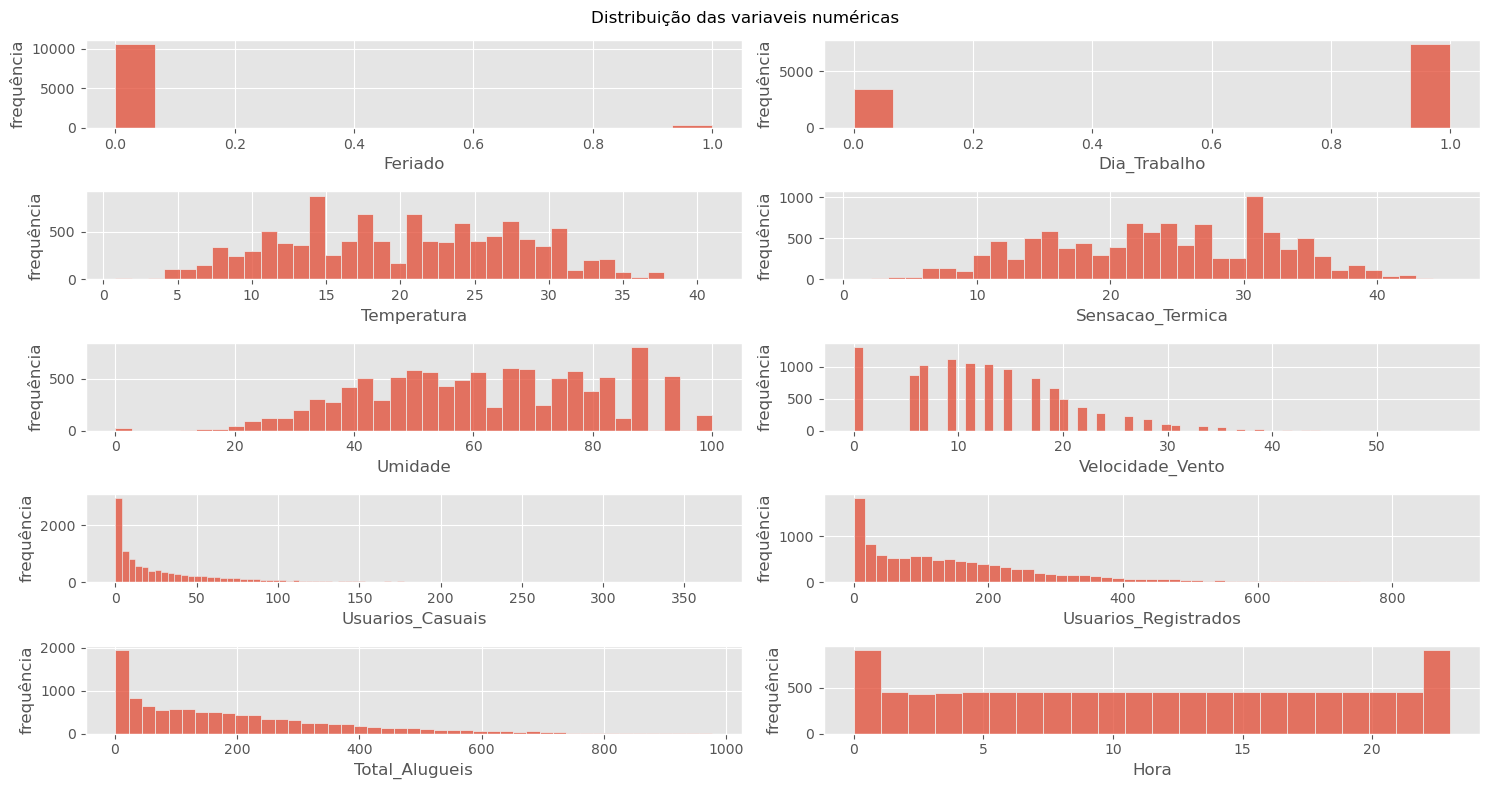

In [100]:
colunas_numericas = bicicletas_yulu.select_dtypes("number").columns
fig, axes = plt.subplots(figsize = (15, 8), ncols = 2, nrows = 5)
axes = axes.flatten()
plt.suptitle("Distribuição das variaveis numéricas")
for i, col in enumerate(colunas_numericas):
    sns.histplot(bicicletas_yulu[col], ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("frequência")

plt.tight_layout()
plt.show()

Após a análise dos gráficos, não foram identificadas anomalias significativas nos dados. Observam-se apenas alguns outliers na contagem de usuários casuais, o que, entretanto, não compromete a análise, pois provavelmente corresponde a dias de alta demanda, em que mais pessoas utilizaram as bicicletas elétricas. Esses pontos podem refletir padrões reais de uso em dias específicos e, portanto, agregam valor à compreensão do comportamento dos usuários.

#### **Variaveis Categóricos**

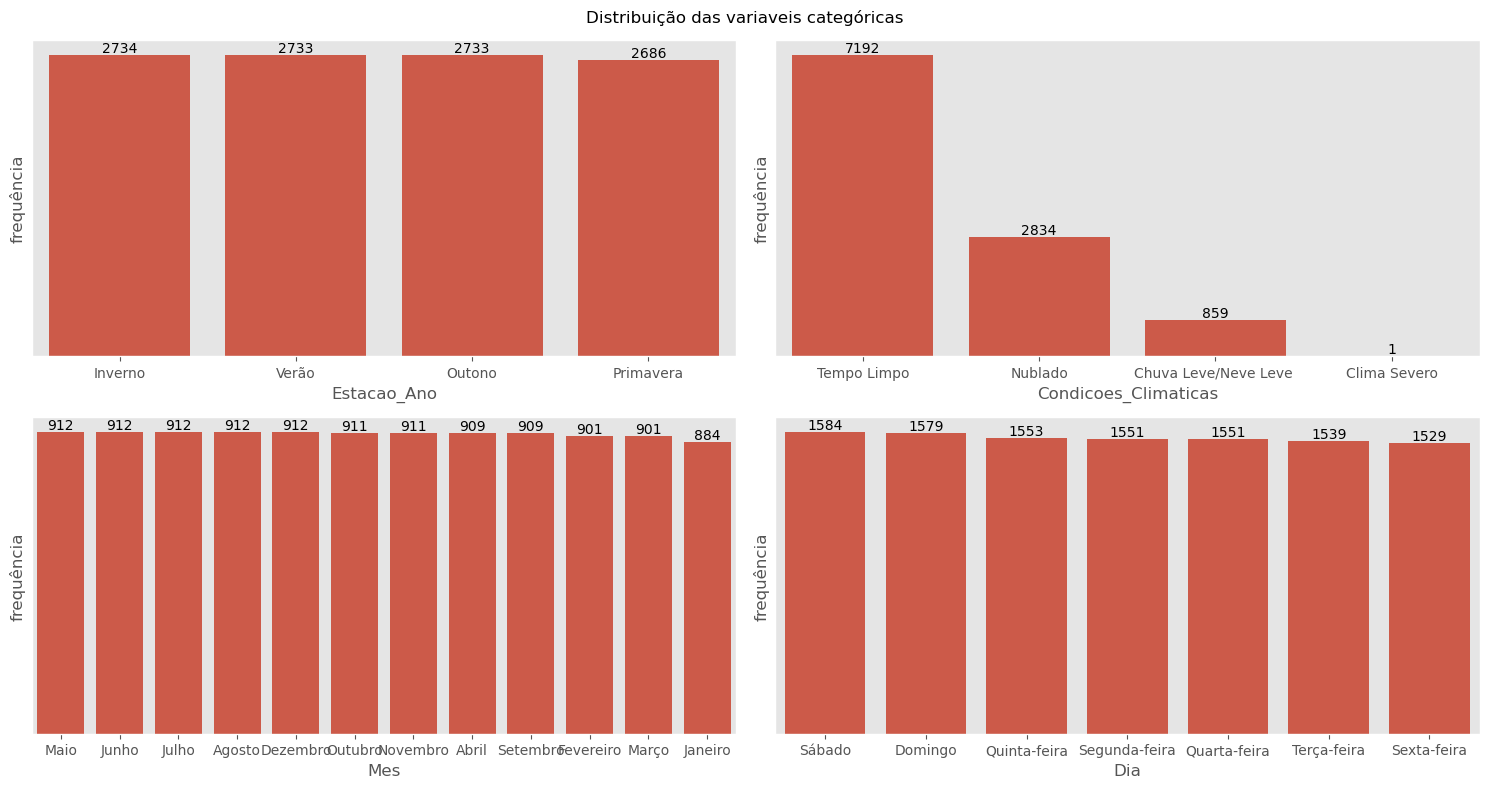

In [101]:
colunas_categoricas = bicicletas_yulu.select_dtypes("object").columns #Aqui eu estou retirando as horas
fig, axes = plt.subplots(figsize = (15, 8), ncols = 2, nrows = 2)
axes = axes.flatten()
plt.suptitle("Distribuição das variaveis categóricas")
for i, col in enumerate(colunas_categoricas):
    colunas_categoricas_frequencia = bicicletas_yulu[col].value_counts().reset_index()
    colunas_categoricas_frequencia.columns = [col, "frequencia"]
    sns.barplot(data =colunas_categoricas_frequencia, x = col, y="frequencia", ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("frequência")
    axes[i].set_yticks([]) 
    for j, v in enumerate(colunas_categoricas_frequencia["frequencia"]):
        axes[i].text(j, v, str(v), ha = "center", va = "bottom")

# Remove os eixos não usados
for j in range(len(colunas_categoricas), len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()

De forma geral, observa-se que a maioria das variáveis categóricas apresenta uma distribuição relativamente equilibrada entre suas categorias. A principal exceção está nas condições climáticas, em que o tempo limpo aparece de forma predominante em relação às demais categorias.

Esse padrão levanta uma questão importante: embora seja esperado que dias de céu limpo favoreçam uma maior utilização das bicicletas, é necessário verificar se a predominância dessa condição realmente se traduz em maior demanda. Em outras palavras, o fato de haver mais registros em dias de tempo limpo não garante, por si só, que essa variável seja um fator determinante para o aumento do uso das bicicletas. Uma análise mais detalhada poderá confirmar se a associação entre clima e demanda é tão forte quanto se supõe. Este tipo de análise vai ser feita na análise bivariada.


### **Análise Bivariada**
#### **Variaveis numéricas**

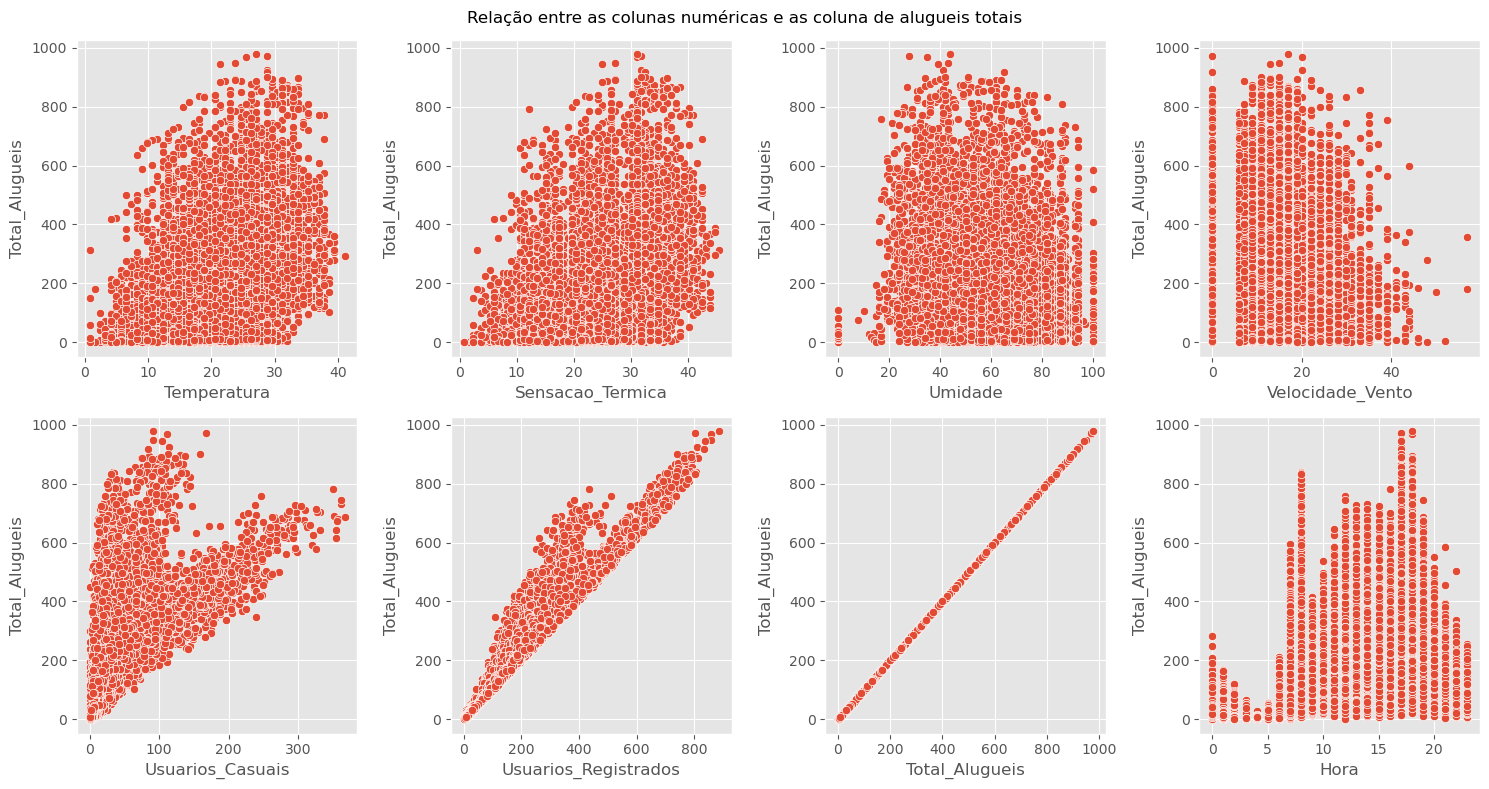

In [102]:
colunas_numericas_sem_binarias = colunas_numericas[2:] #Aqui filtramos só as colunas que não são binárias
fig, axes = plt.subplots(figsize=(15, 8), ncols=4, nrows=2)
axes = axes.flatten()
plt.suptitle("Relação entre as colunas numéricas e as coluna de alugueis totais")
for i, col in enumerate(colunas_numericas_sem_binarias):
    # scatter
    sns.scatterplot(x=bicicletas_yulu[col], y=bicicletas_yulu["Total_Alugueis"], ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Total_Alugueis")

remove_eixos_inuteis(colunas_numericas_sem_binarias, axes, fig)

plt.tight_layout()
plt.show()


Observa-se uma tendência de que temperaturas mais elevadas estejam associadas a um maior número de aluguéis. O mesmo ocorre com a sensação térmica, que também apresenta indícios de maior utilização conforme seus valores aumentam.

No caso da umidade, os pontos estão bastante dispersos, o que dificulta a identificação de uma relação clara com a demanda. A velocidade do vento, por sua vez, sugere que valores mais baixos possam favorecer o uso das bicicletas, embora a variabilidade dos dados não permita conclusões definitivas.

Quanto aos usuários casuais e registrados, percebe-se uma forte correlação positiva em relação ao total de aluguéis, o que é esperado, já que ambos compõem diretamente essa soma.

Além disso, ao analisar a variável de horário, nota-se que os maiores picos de uso ocorrem aproximadamente entre 7h e 20h, o que pode estar relacionado aos períodos de deslocamento para o trabalho e à jornada diária de atividades.



#### **Variaveis Binárias/Categóricas**

Aqui, utilizarei a mediana, pois os dados de aluguel total apresentam assimetria positiva. Como a média é uma medida sensível a valores extremos, seu uso poderia distorcer a análise. Portanto, irei analisar os dados considerando a mediana, que é uma medida robusta e não é afetada por valores extremos.

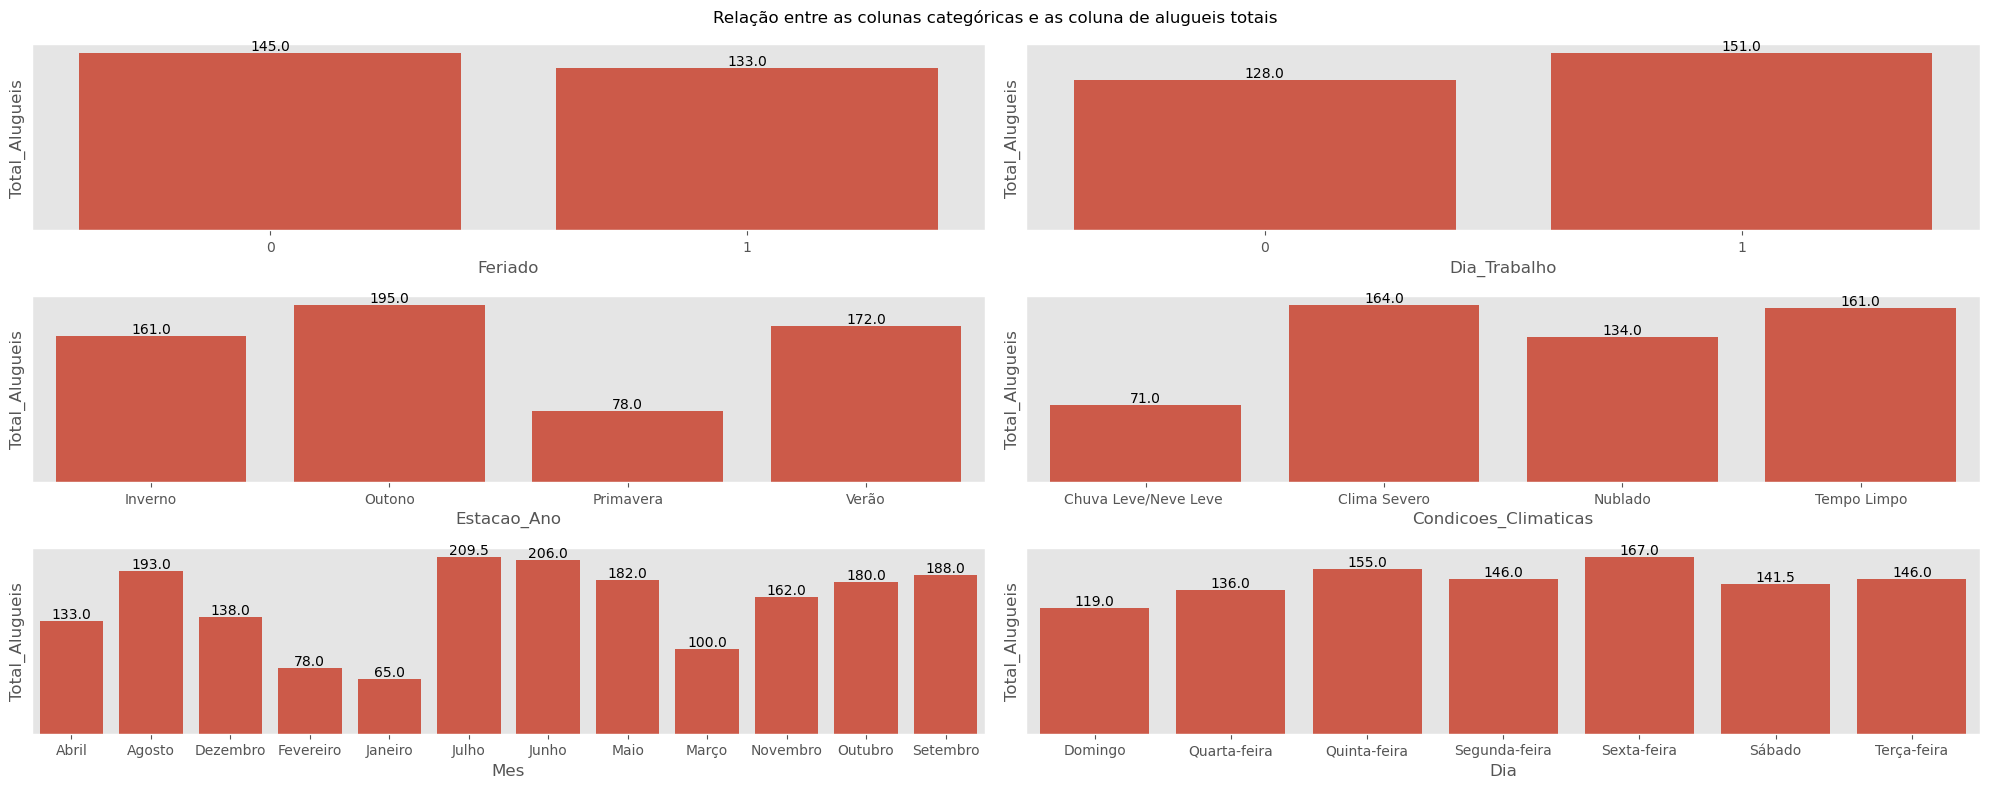

In [106]:
colunas_binarias_categoricas = ["Feriado", "Dia_Trabalho"] + list(colunas_categoricas)
fig, axes = plt.subplots(figsize=(20, 8), ncols=2, nrows=3)
axes = axes.flatten()
plt.suptitle("Relação entre as colunas categóricas e as coluna de alugueis totais")
for i, col in enumerate(colunas_binarias_categoricas):
    relacao = bicicletas_yulu[[col, "Total_Alugueis"]].groupby(col).median().reset_index()
    relacao.columns = [col, "Mediana_Alugueis"]
    sns.barplot(data = relacao, x=col, y="Mediana_Alugueis", ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Total_Alugueis")
    axes[i].set_yticks([]) 
    for j, v in enumerate(relacao["Mediana_Alugueis"]):
        axes[i].text(j, v, str(v), ha = "center", va = "bottom")


plt.tight_layout()
plt.show()


Aqui temos algumas observações:

* **Feriados:** os dias de feriado aparentam ter **menos procura por bikes** do que os dias comuns.

* **Dias de trabalho:** apresentam **maior demanda** em comparação com dias de não trabalho (feriados e finais de semana).

* **Estação do ano:** a procura parece ser maior no **verão** e no **outono**, enquanto na **primavera** e no **inverno** a demanda é menor.

* **Condições climáticas:** o clima **limpo** apresenta a maior procura. Como há apenas um registro de clima chuvoso, **não é possível tirar conclusões sobre essa condição**.

* **Meses:** meses como **maio, junho, julho, agosto, outubro, novembro e dezembro** se destacam. Como os dados não estão organizados por mês, irei criar um **plot da soma das procuras nesses períodos** para avaliar se há **sazonalidade**. Essa tendência **corresponde às estações do ano**, com o verão de março a junho, quando a procura começa a aumentar, e o outono de outubro a novembro, que também apresenta maior interesse.

* **Dia da semana:** **quinta e sexta-feira** apresentam o maior volume de procura, enquanto os finais de semana, como o domingo, apresentam menor demanda. Isso **corresponde à observação de que os dias de trabalho têm maior procura**.




#### **Analise Temporal**

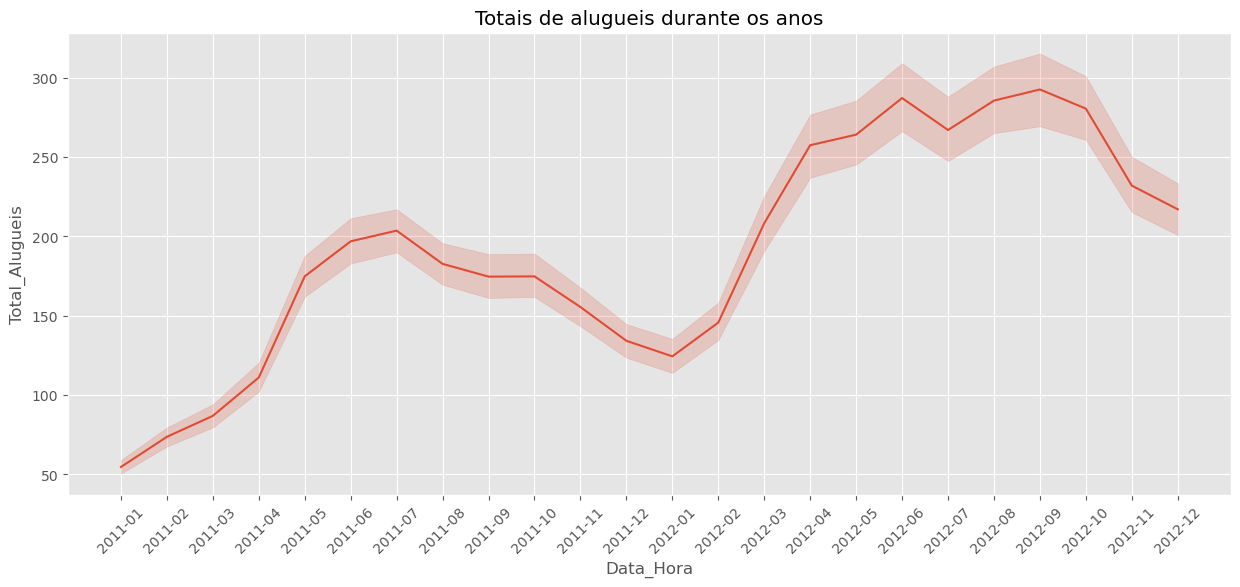

In [112]:
plt.figure(figsize = (15,6))
plt.title("Totais de alugueis durante os anos")
sns.lineplot(x = bicicletas_yulu["Data_Hora"].dt.to_period("M").astype(str), y= bicicletas_yulu["Total_Alugueis"])
plt.xticks(rotation = 45)
plt.show()



Fica evidente a **sazonalidade** na procura por bicicletas elétricas. Entre **dezembro e fevereiro** (inverno), a demanda é menor, como observado anteriormente. A partir de **março até junho** (verão), ocorre um **pico de uso**, refletindo o aumento da procura nessa estação. Em seguida, a demanda começa a diminuir, apresentando um **novo pico entre outubro e novembro** (outono).

No entanto, o **verão é claramente o período de maior procura**, possivelmente devido às **condições climáticas mais quentes**, que tendem a incentivar o uso das bicicletas. Para confirmar essa relação, será feita uma análise da **temperatura durante essas estações**, verificando se o aumento da procura realmente **corresponde a temperaturas mais elevadas**. Dessa forma, poderemos entender como a **temperatura e a estação do ano influenciam diretamente na demanda por bicicletas elétricas**.



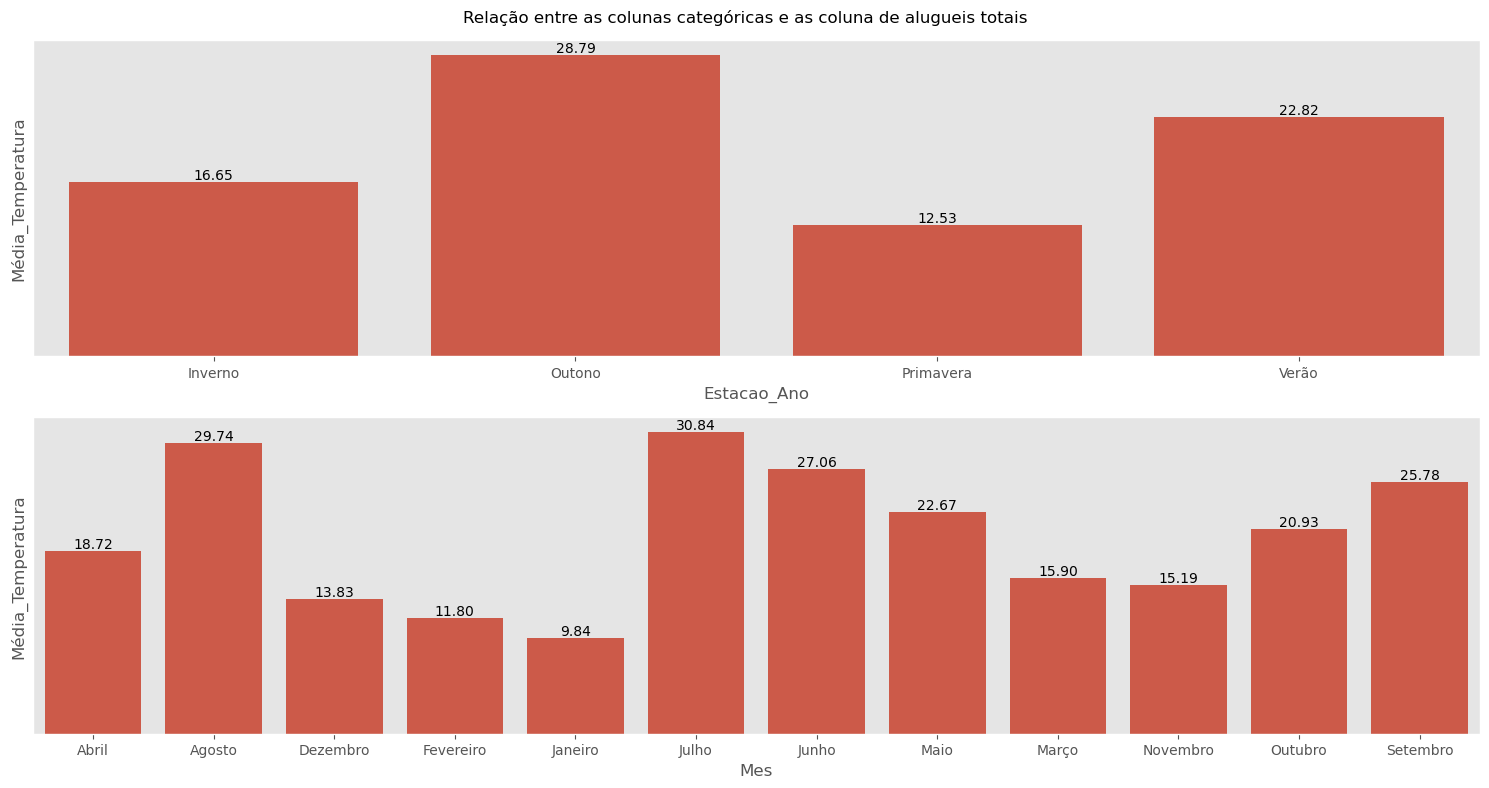

In [117]:
colunas_relacionar_temperatura = ["Estacao_Ano", "Mes"]
fig, axes = plt.subplots(figsize=(15, 8), ncols=1, nrows=2)
axes = axes.flatten()
plt.suptitle("Relação entre as colunas categóricas e as coluna de alugueis totais")
for i, col in enumerate(colunas_relacionar_temperatura):
    relacao = bicicletas_yulu[[col, "Temperatura"]].groupby(col).mean().reset_index()
    relacao.columns = [col, "Mediana_Temperatura"]
    sns.barplot(data = relacao, x=col, y="Mediana_Temperatura", ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Média_Temperatura")
    axes[i].set_yticks([]) 
    for j, v in enumerate(relacao["Mediana_Temperatura"]):
        vS = f"{v:.2f}"
        axes[i].text(j, v, vS, ha = "center", va = "bottom")



plt.tight_layout()
plt.show()


Como previsto, os meses de maior destaque analisados anteriormente **realmente apresentam temperaturas mais altas**, confirmando que os períodos mais quentes — e, consequentemente, as estações mais quentes — **favorecem o uso das bicicletas**. Nos meses mais frios, que podem apresentar chuva ou condições climáticas desfavoráveis, utilizar a bicicleta para deslocamentos pessoais **não é tão viável**, pois o risco de se molhar ou enfrentar clima ruim é maior. Nesses períodos, **metrô ou ônibus** tendem a ser opções mais praticáveis.

Por outro lado, durante as estações mais quentes, **utilizar transporte público pode se tornar desconfortável devido ao calor**, tornando a bicicleta uma alternativa mais atrativa. Isso se alinha com a análise anterior, que mostrou que **os dias com céu mais limpo apresentam maior uso das bicicletas**. Portanto, os dados indicam claramente que **as condições de temperatura e clima influenciam diretamente a preferência pelo uso das bicicletas**, sendo os períodos quentes e ensolarados os mais favoráveis.

---

### Resumo da Análise Bivariada

A demanda por bicicletas elétricas apresenta **forte relação com a temperatura e a estação do ano**: períodos mais quentes, como o **verão (março a junho)** e parte do **outono (outubro e novembro)**, concentram os maiores números de aluguéis. Nos meses frios ou com chuva, a procura diminui, tornando o **transporte público** mais utilizado.

**Dias de trabalho** registram maior demanda do que **feriados e finais de semana**, com picos de uso entre **7h e 20h**, provavelmente relacionados a deslocamentos e atividades diárias.

**Condições climáticas** influenciam a utilização: **céu limpo** está associado a maior uso, enquanto registros de chuva são insuficientes para conclusões.

Além disso, o **total de aluguéis** apresenta forte correlação com usuários casuais e registrados, refletindo diretamente na soma total.

Em resumo, **temperatura, estação do ano, clima e tipo de dia** são os principais fatores que determinam a demanda por bicicletas elétricas, sendo os períodos quentes e ensolarados os mais favoráveis ao seu uso.



### **Análise de Testes de Hipóteses**

Esta etapa tem como objetivo **confirmar hipóteses que não ficaram totalmente claras na análise exploratória**. Serão realizados **testes de hipóteses, cálculos de probabilidades condicionais, inferência causal** e outras análises estatísticas para fornecer **evidências mais robustas sobre os padrões observados nos dados**.


#### **Probabilidades Condicionais**
Aqui, irei analisar as variáveis Dia de Trabalho, Feriado,Dia de Trabalho, Condicoes Climaticas avaliando a probabilidade de que essas variáveis estejam associadas a uma procura por bicicletas acima da mediana.

In [141]:
#Dia de Trabaho. Sabando que é dia de trabalho, qual a probabilidade de ter uma procura a mais nas bicicletas?
def caclcula_probabilidade_condicional(mediana_bicicletas, coluna, base):

    bicicletas_yulu_base = bicicletas_yulu[bicicletas_yulu[coluna] ==base]

    bicicletas_yulu_base_acima_mediana = bicicletas_yulu_base[bicicletas_yulu_base["Total_Alugueis"]>mediana_bicicletas]

    return bicicletas_yulu_base_acima_mediana.shape[0] / bicicletas_yulu_base.shape[0]



mediana_bicicletas = bicicletas_yulu["Total_Alugueis"].median()
colunas_analise_probabilidade = ["Estacao_Ano", "Feriado", "Dia_Trabalho", "Condicoes_Climaticas"]
for col in colunas_analise_probabilidade:
    print(col.upper())
    for valor_unico in bicicletas_yulu[col].unique():
        probabilidade = caclcula_probabilidade_condicional(mediana_bicicletas, col, valor_unico)
        print(f"{valor_unico}: {probabilidade:.2f}" )

ESTACAO_ANO
Primavera: 0.29
Verão: 0.56
Outono: 0.61
Inverno: 0.54
FERIADO
0: 0.50
1: 0.49
DIA_TRABALHO
0: 0.47
1: 0.51
CONDICOES_CLIMATICAS
Tempo Limpo: 0.53
Nublado: 0.48
Chuva Leve/Neve Leve : 0.29
Clima Severo: 1.00



#### Insights da Análise de Probabilidade Condicional

* **Estação do Ano:** O **outono (0,61)** e o **verão (0,56)** apresentam as maiores probabilidades de procura acima da mediana, confirmando a análise anterior sobre a influência das estações. Já a **primavera (0,29)** tem a menor influência, indicando que os meses mais quentes ou de clima mais agradável favorecem o uso das bicicletas.

* **Feriado:** A probabilidade é muito próxima entre feriados (0,49) e dias comuns (0,50), mostrando que a variável **não influencia significativamente** a procura acima da mediana. Como vimos nos gráficos anteriores, a diferença é mínima, mas será confirmada estatisticamente nos testes de hipótese para verificar se a diferença é significativa.

* **Dia de Trabalho:** Há uma diferença pequena (0,51 em dias de trabalho vs 0,47 em dias sem trabalho), indicando que **dias de trabalho tendem a apresentar ligeiramente mais procura**, mas a variação ainda não é suficientemente grande para conclusões definitivas. Por isso, será necessário aplicar **teste de hipótese** para validar a significância dessa diferença.

* **Condições Climáticas:** O **tempo limpo (0,53)** apresenta maior probabilidade de uso acima da mediana, seguido de nublado (0,48) e chuva leve/neve leve (0,29). O **clima severo (1,00)** não pode ser considerado, pois se baseia em apenas um registro. Isso reforça que **dias com céu limpo favorecem o uso das bicicletas**, enquanto condições desfavoráveis reduzem a demanda.




#### **Testes Estatísticos**

Nesta etapa, serão avaliadas hipóteses para verificar se as diferenças observadas durante a análise exploratória são **estatisticamente significativas**. O objetivo é confirmar, com maior rigor, se variáveis como **Dia de Trabalho, Condições Climáticas e Sensação Térmica** possuem uma relação consistente com a quantidade de aluguéis de bicicletas, indo além da simples interpretação visual ou descritiva.

Como a variável **Total de Aluguéis** apresenta uma distribuição **assimétrica**, optarei pela aplicação de **testes não paramétricos**, que não pressupõem normalidade ou simetria nos dados, sendo mais adequados para este tipo de situação.




In [150]:
#Variavel Sensação Termica
stats, p = spearmanr(bicicletas_yulu["Sensacao_Termica"], bicicletas_yulu["Total_Alugueis"])

print(f"Sensação Termica | rho={stats:.3f}, p={p:.3e}")
if p > 0.05:
    print(f"Não há relação significativa entre Sensacao Termica e Auguéis")
else:
    print(f"Há relação entre Sensacao Termica e Aluguéis")

Sensação Termica | rho=0.407, p=0.000e+00
Há relação entre Sensacao Termica e Aluguéis


In [151]:
#Colunas binarias
colunas_binarias = ["Feriado",	"Dia_Trabalho"]
for col in colunas_binarias:
    grupos = [group["Total_Alugueis"].values for _, group in bicicletas_yulu.groupby(col)]
    stat, p = kruskal(*grupos)
    print(f"{col}| rho={stats:.3f}, p={p:.3e}")
    if p > 0.05:
        print(f"Não há relação significativa entre {col} e Aluguéis")
    else:
        print(f"Há relação entre {col} e Aluguéis")

Feriado| rho=0.407, p=8.646e-01
Não há relação significativa entre Feriado e Aluguéis
Dia_Trabalho| rho=0.407, p=9.679e-01
Não há relação significativa entre Dia_Trabalho e Aluguéis




Analisando os resultados, observa-se que a **sensação térmica** também apresenta relação significativa com a demanda, reforçando a hipótese de que **temperatura e sensação térmica mais elevadas tendem a aumentar o uso das bicicletas**. Esse achado confirma as análises anteriores sobre a influência das condições climáticas e das estações do ano no número de aluguéis.

Por outro lado, não foi encontrada evidência estatisticamente significativa de relação entre **Feriado** ou **Dia de Trabalho** e a quantidade de aluguéis. Isso indica que essas variáveis **não exercem influência relevante** na procura pelas bicicletas.

